In [1]:
import pandas as pd
import re

# Function to extract data from baseline log file with muon_time
def extract_baseline_data(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            # Only extract lines that have val_loss information
            if 'val_loss' in line:
                # Extract data using regex
                match = re.search(r'step:([0-9]+)/[0-9]+ val_loss:([0-9.]+) train_time:([0-9]+)ms .* muon_time:([0-9]+)ms', line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3))
                    muon_time = int(match.group(4))
                    data.append({
                        'step': step,
                        'train_time': train_time,
                        'muon_time': muon_time,
                        'val_loss': val_loss
                    })
    return pd.DataFrame(data)

# Function to extract data from SOAP log file with optim_time
def extract_soap_data(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            # Only extract lines that have val_loss information
            if 'val_loss' in line:
                # Extract data using regex
                match = re.search(r'step:([0-9]+)/[0-9]+ val_loss:([0-9.]+) train_time:([0-9]+)ms .* optim_time:([0-9]+)ms', line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3))
                    optim_time = int(match.group(4))
                    data.append({
                        'step': step,
                        'train_time': train_time,
                        'optim_time': optim_time,
                        'val_loss': val_loss
                    })
    return pd.DataFrame(data)

# Extract data from both log files
baseline_df = extract_baseline_data('logs/baseline_run_3.19.txt')
soap_df = extract_soap_data('logs/soap_3.20.txt')

# Display the first few rows of each dataframe
print("Baseline DataFrame:")
baseline_df.head()


Baseline DataFrame:


,step,train_time,muon_time,val_loss
0,0,0,0,10.8258
1,125,27116,1166,4.5295
2,250,54290,2338,4.1958
3,375,81605,3498,4.0436
4,500,109073,4611,3.9452


In [2]:
# Display SOAP dataframe
print("SOAP DataFrame:")
soap_df.head()


SOAP DataFrame:


,step,train_time,optim_time,val_loss
0,0,0,0,10.8258
1,125,68815,43907,7.3375
2,250,134879,84447,6.5570
3,375,203259,126807,5.6387
4,500,270092,167348,5.1306


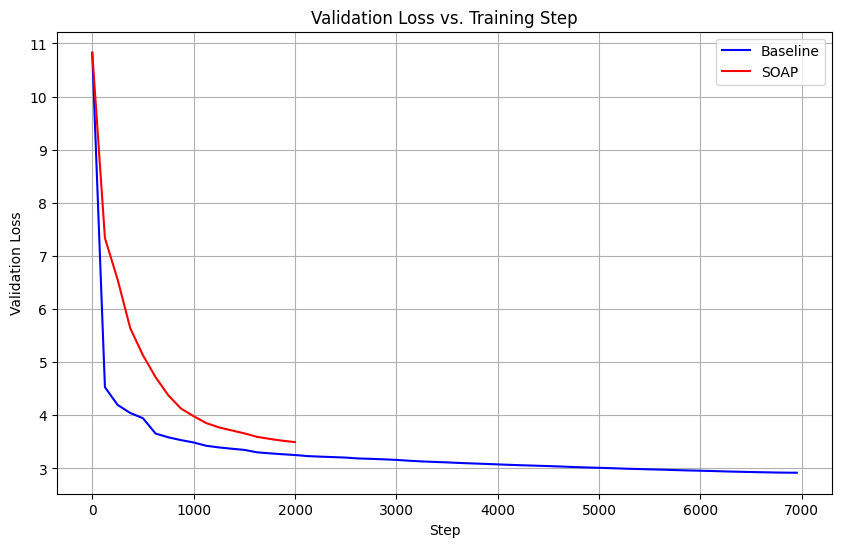

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(baseline_df['step'], baseline_df['val_loss'], 'b-', label='Baseline')
plt.plot(soap_df['step'], soap_df['val_loss'], 'r-', label='SOAP')
plt.xlabel('Step')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Training Step')
plt.legend()
plt.grid(True)
plt.show()

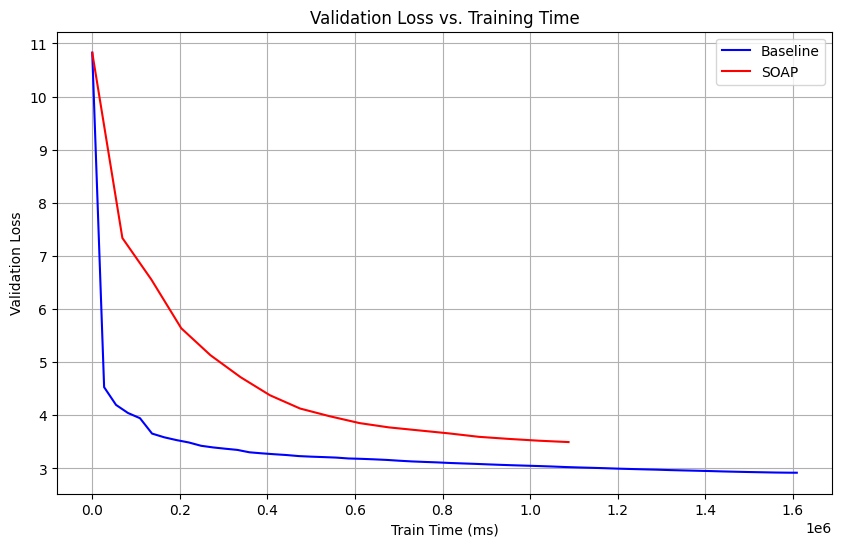

In [4]:
# Second graph: Train Time vs Val Loss
plt.figure(figsize=(10, 6))
plt.plot(baseline_df['train_time'], baseline_df['val_loss'], 'b-', label='Baseline')
plt.plot(soap_df['train_time'], soap_df['val_loss'], 'r-', label='SOAP')
plt.xlabel('Train Time (ms)')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Training Time')
plt.legend()
plt.grid(True)
plt.show()